## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    """Code Here
    建立你的神經網路
    """
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() #Clear old Graph
    print('Experiment with Regulizer = {:.6f}'.format(regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    #collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-l1-{}'.format(str(regulizer_ratio))
    results[exp_name_tag] = {'train-loss' : train_loss,
                            'valid-loss' : valid_loss,
                            'train-acc' : train_acc,
                            'valid-acc' : valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 7s 136us/step - loss: 2.4626 - accuracy: 0.0990 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.4626 - accuracy: 0.0990 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.4626 - accuracy: 0.0993 - val_loss: 2.4625 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

Epoch 46/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.7909 - accuracy: 0.6201 - val_loss: 3.0074 - val_accuracy: 0.5432
Epoch 47/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.7510 - accuracy: 0.6237 - val_loss: 3.0397 - val_accuracy: 0.5156
Epoch 48/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.7071 - accuracy: 0.6279 - val_loss: 2.9635 - val_accuracy: 0.5314
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.6769 - accuracy: 0.6252 - val_loss: 2.9863 - val_accuracy: 0.5146
Epoch 50/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.6408 - accuracy: 0.6261 - val_loss: 2.9343 - val_accuracy: 0.5244
Experiment with Regulizer = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

50000/50000 [==============================] - 7s 135us/step - loss: 0.9569 - accuracy: 0.6622 - val_loss: 1.3539 - val_accuracy: 0.5340
Epoch 44/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9459 - accuracy: 0.6689 - val_loss: 1.3814 - val_accuracy: 0.5238
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9350 - accuracy: 0.6712 - val_loss: 1.4013 - val_accuracy: 0.5227
Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9180 - accuracy: 0.6778 - val_loss: 1.4359 - val_accuracy: 0.5189
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9104 - accuracy: 0.6814 - val_loss: 1.3667 - val_accuracy: 0.5374
Epoch 48/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.8955 - accuracy: 0.6845 - val_loss: 1.3991 - val_accuracy: 0.5193
Epoch 49/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.8847 - accuracy: 0.6911 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9800 - accuracy: 0.6558 - val_loss: 1.4817 - val_accuracy: 0.4971
Epoch 42/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9676 - accuracy: 0.6609 - val_loss: 1.3563 - val_accuracy: 0.5273
Epoch 43/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9545 - accuracy: 0.6661 - val_loss: 1.3690 - val_accuracy: 0.5324
Epoch 44/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9431 - accuracy: 0.6695 - val_loss: 1.4548 - val_accuracy: 0.5052
Epoch 45/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9268 - accuracy: 0.6766 - val_loss: 1.4248 - val_accuracy: 0.5183
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.9230 - accuracy: 0.6774 - val_loss: 1.3555 - val_accuracy: 0.5353
Epoch 47/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.9057 - accuracy: 0.6825

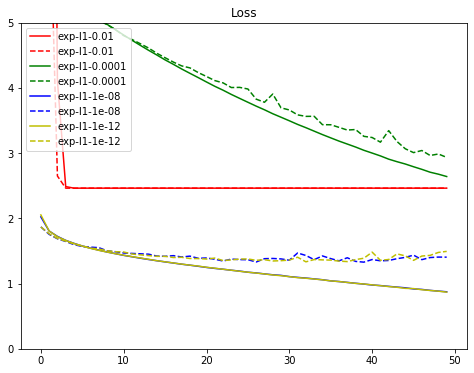

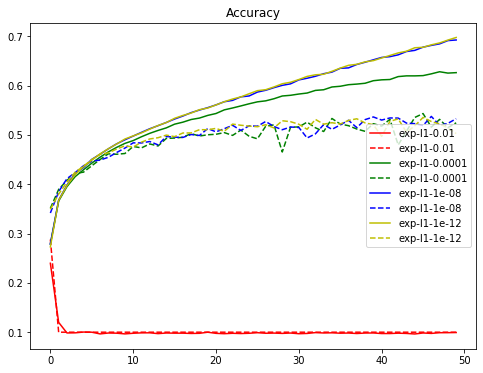

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()